In [14]:
! pip install -Uqq fastai

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from fastai.tabular.all import *
import warnings


warnings.filterwarnings("ignore")

In [17]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
def add_feature(df):
  df["log_capital_gain"]=np.log(df["capital-gain"]+1)
  df["log_capital_loss"]=np.log(df["capital-loss"]+1)
  return

add_feature(df)

In [19]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log_capital_gain,log_capital_loss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0


In [20]:
splits = RandomSplitter(seed=42)(df)

In [21]:
doc(RandomSplitter)

RandomSplitter(valid_pct=0.2, seed=None)
Create function that splits `items` between train/val with `valid_pct` randomly.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [22]:
dblock = TabularPandas(df, splits = splits, # data splits
    procs = [Categorify, FillMissing, Normalize], # data preprocessing
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], # categorical attribute column names
    cont_names = ['age', 'fnlwgt', 'educational-num', 'log_capital_gain', 'log_capital_loss', 'hours-per-week'], # continuous attribute column names
    y_names = "income", #Target column name
    y_block = CategoryBlock()) # Categorify


In [23]:
dls = dblock.dataloaders()

# Train the model

In [24]:

model = tabular_learner(dls,metrics=accuracy,layers=[10, 10, 10])



# Learning Rate Finder

SuggestedLRs(slide=0.0691830962896347, valley=0.0063095735386013985)

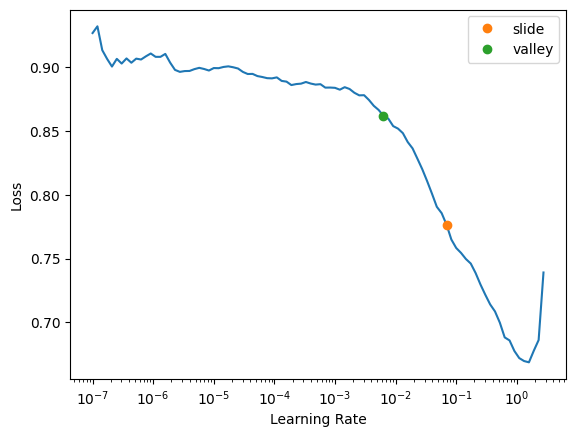

In [25]:
model.lr_find(suggest_funcs=(slide, valley))

In [26]:
model.fit(15,lr=0.02)

epoch,train_loss,valid_loss,accuracy,time
0,0.344071,0.332011,0.851147,00:10
1,0.333794,0.321744,0.850020,00:08
2,0.339528,0.324785,0.852273,00:09
3,0.339935,0.326421,0.847052,00:10
4,0.341847,0.320751,0.852682,00:08
5,0.337001,0.320042,0.852375,00:09
6,0.323235,0.317190,0.852580,00:08
7,0.319699,0.318423,0.854115,00:09
8,0.329863,0.315875,0.853399,00:09
9,0.329507,0.319355,0.854218,00:08
